# Text Mining

## Load necessary packages

In [1]:
from pathlib import Path
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
from unidecode import unidecode
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
import string
import collections as ct
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import RSLPStemmer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import gensim
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from math import ceil

In [2]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Mafalda\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Load corpora

In [3]:
def load_corpus(filename):
    corpus = Path(filename).read_text(encoding="utf8")
    return corpus

In [4]:
def load_corpora(filelist,author):
    files = []
    for file in filelist:
        location = "Corpora/train/"+file
        corpus = load_corpus(location)
        files.append(corpus)
    df = pd.DataFrame(files, columns=['Text'])
    df['Author'] = pd.Series([author for x in range(len(df.index))], index=df.index)
    return df

In [5]:
almada = [
    'AlmadaNegreiros/pg22615.txt',
    'AlmadaNegreiros/pg22730.txt',
    'AlmadaNegreiros/pg22801.txt',
    'AlmadaNegreiros/pg22802.txt',
    'AlmadaNegreiros/pg22969.txt',
    'AlmadaNegreiros/pg23133.txt',
    'AlmadaNegreiros/pg23620.txt',
    'AlmadaNegreiros/pg23879.txt',
    'AlmadaNegreiros/pg23961.txt'
]

corpora_almada = load_corpora(almada, 'Almada Negreiros')

In [6]:
camilo = [
    'CamiloCasteloBranco/24691-0.txt',
    'CamiloCasteloBranco/34756-0.txt',
    'CamiloCasteloBranco/pg16425.txt',
    'CamiloCasteloBranco/pg17927.txt',
    'CamiloCasteloBranco/pg19375.txt',
    'CamiloCasteloBranco/pg21406.txt',
    'CamiloCasteloBranco/pg23203.txt',
    'CamiloCasteloBranco/pg23345.txt',
    'CamiloCasteloBranco/pg23346.txt',
    'CamiloCasteloBranco/pg24339.txt',
    'CamiloCasteloBranco/pg25844.txt',
    'CamiloCasteloBranco/pg26017.txt',
    'CamiloCasteloBranco/pg26103.txt',
    'CamiloCasteloBranco/pg26110.txt',
    'CamiloCasteloBranco/pg26988.txt',
    'CamiloCasteloBranco/pg27364.txt',
    'CamiloCasteloBranco/pg27541.txt',
    'CamiloCasteloBranco/pg28310.txt',
    'CamiloCasteloBranco/pg31694.txt',
    'CamiloCasteloBranco/pg33788.txt',
]

corpora_camilo = load_corpora(camilo, 'Camilo Castelo Branco')

In [7]:
eca = [
    'EcaDeQueiros/pg18220.txt',
    'EcaDeQueiros/pg25641.txt',
    'EcaDeQueiros/pg27637.txt',
    'EcaDeQueiros/pg31347.txt',
    'EcaDeQueiros/pg40409.txt'
]

corpora_eca = load_corpora(eca, 'Eca de Queiros')

In [8]:
rodrigues_santos = [
    'JoseRodriguesSantos/A Filha Do Capitao - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Formula De Deus - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Mao do Diabo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/A Vida Num Sopro - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/Furia Divina - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Anjo Branco - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O Setimo Selo - Jose Rodrigues dos Santos.txt',
    'JoseRodriguesSantos/O ultimo Segredo - Jose Rodrigues dos Santos.txt'
]

corpora_rodrigues_santos = load_corpora(rodrigues_santos, 'Jose Rodrigues dos Santos')

In [9]:
saramago = [
    'JoseSaramago/A Caverna - Jose Saramago.txt',
    'JoseSaramago/As Intermitencias da Morte - Jose Saramago.txt',
    'JoseSaramago/Caim - Jose Saramago.txt',
    'JoseSaramago/Claraboia - Jose Saramago.txt',
    'JoseSaramago/Ensaio Sobre a Cegueira - Jose Saramago.txt',
    'JoseSaramago/Historia Do Cerco De Lisboa - Jose Saramago.txt',
    'JoseSaramago/Memorial Do Convento - Jose Saramago.txt',
    'JoseSaramago/O Ano Da Morte De Ricardo Reis - Jose Saramago.txt',
    'JoseSaramago/O Conto Da Ilha Desconhecida - Jose Saramago.txt',
    'JoseSaramago/O Homem Duplicado - Jose Saramago.txt',
    'JoseSaramago/Terra Do Pecado - Jose Saramago.txt',
    'JoseSaramago/Viagem Do Elefante - Jose Saramago.txt'
]

corpora_saramago = load_corpora(saramago, 'Jose Saramago')

In [10]:
luisa = [
    'LuisaMarquesSilva/ABelaHistoria.txt',
    'LuisaMarquesSilva/acabouSe.txt',
    'LuisaMarquesSilva/Botão.txt',
    'LuisaMarquesSilva/controlz.txt',
    'LuisaMarquesSilva/emedo.txt',
    'LuisaMarquesSilva/Lisboa2050.txt',
    'LuisaMarquesSilva/passeioInferno.txt',
    'LuisaMarquesSilva/rapsodiasemdo.txt',
    'LuisaMarquesSilva/UltimaHistoria.txt'
]

corpora_luisa = load_corpora(luisa, 'Luisa Marques Silva')

In [11]:
corpora = pd.concat([corpora_almada, corpora_camilo, corpora_eca, corpora_rodrigues_santos, corpora_saramago, corpora_luisa]).reset_index(drop = True)
corpora

,Text,Author
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco


## Preprocessing

In [12]:
def preprocessing(dataframe,stemmer):
    processed_corpus = []
    
    stop_words_pt = set(stopwords.words("portuguese", "english"))
    
    for i in tqdm(range(len(dataframe))):
        text = dataframe['Text'][i]
        
        #Remove accents
        text = unidecode(text)
        
        #remove punctuation
        text = re.sub('[^a-zA-Z]', ' ', text)
        
        #Convert to lowercase
        text = text.lower()

        #remove tags
        text = BeautifulSoup(text).get_text()
        
        #Convert to list from string
        text = text.split()

        #Stemming
        if stemmer == 'snowball':
            stemmer_pt = SnowballStemmer('portuguese')
        elif stemmer == 'rslp':
            stemmer_pt = RSLPStemmer()
            
        text = [stemmer_pt.stem(word) for word in text if not word in stop_words_pt]
        
        text = " ".join(text)

        processed_corpus.append(text)
    return processed_corpus

In [13]:
cleaned_corpora = preprocessing(corpora,'snowball')

In [14]:
corpora['Clean Text'] = pd.Series(cleaned_corpora, index = corpora.index)

In [15]:
corpora['Word List'] = corpora['Clean Text']

for i in tqdm(range(len(corpora))):
    mystr = corpora['Clean Text'][i]
    wordList = re.sub("[^\w]", " ",  mystr).split()
    
    corpora['Word List'][i] = wordList

In [16]:
corpora

,Text,Author,Clean Text,Word List
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,titl scen odi author jos almad negreir releas ...,"[titl, scen, odi, author, jos, almad, negreir,..."
1,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,titl jardim pierrett author jos almad negreir ...,"[titl, jardim, pierrett, author, jos, almad, n..."
2,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,..."
3,\nTitle: Litoral\n A Amadeo de Souza Car...,Almada Negreiros,titl litoral amad souz cardoz author jos almad...,"[titl, litoral, amad, souz, cardoz, author, jo..."
4,\n\n\nEXPOSIÇÃO\n\n+amadeo\nde souza\ncardoso+...,Almada Negreiros,exposica amad souz cardos lig naval lisbo port...,"[exposica, amad, souz, cardos, lig, naval, lis..."
5,\n\n*JOSÉ DE ALMADA-NEGREIROS*\n\n\n*K4\n\no q...,Almada Negreiros,jos almad negreir k quadr azul acab aparec poe...,"[jos, almad, negreir, k, quadr, azul, acab, ap..."
6,"\n\n*""ORPHEU""*\n\nREVISTA TRIMESTRAL DE LITERA...",Almada Negreiros,orpheu revist trimestral literatur portugal br...,"[orpheu, revist, trimestral, literatur, portug..."
7,\n\n+a ENGOMADEIRA+\n\nNOVELA VULGAR LISBOETA\...,Almada Negreiros,engomadeir novel vulg lisboet engomadeir jos a...,"[engomadeir, novel, vulg, lisboet, engomadeir,..."
8,\n+MANIFESTO+\n\n+ANTI-DANTAS+\n\nE\n\nPOR EXT...,Almada Negreiros,manifest anti dant extens jos almad negreir po...,"[manifest, anti, dant, extens, jos, almad, neg..."
9,O vinho do Porto\n\nPROCESSO D'UMA BESTIALIDAD...,Camilo Castelo Branco,vinh port process d bestial inglez exposica th...,"[vinh, port, process, d, bestial, inglez, expo..."


In [17]:
corpora_500 = pd.DataFrame(columns=['OG Index','500 Word List','500 Clean Text'])

for i in tqdm(range(len(corpora))):
    text = corpora['Word List'][i]
    list_500 = [text[i:i+500] for i in range(0, len(text), 500)]
    text_500 = [" ".join(list) for list in list_500]
    
    d_500 = pd.DataFrame({'OG Index':[i]*ceil(len(text)/500),'500 Word List':list_500,'500 Clean Text':text_500})
    corpora_500 = corpora_500.append(d_500,ignore_index=True)
    
corpora_500

,OG Index,500 Word List,500 Clean Text
0,0,"[titl, scen, odi, author, jos, almad, negreir,...",titl scen odi author jos almad negreir releas ...
1,0,"[cabeleir, prat, estilhac, herald, vitra, desp...",cabeleir prat estilhac herald vitra despeg len...
2,0,"[cabec, ve, so, olhos, vir, cheir, cheir, terr...",cabec ve so olhos vir cheir cheir terr com ter...
3,1,"[titl, jardim, pierrett, author, jos, almad, n...",titl jardim pierrett author jos almad negreir ...
4,2,"[titl, invenca, dia, clar, author, jos, almad,...",titl invenca dia clar author jos almad negreir...
5,2,"[i, part, andaim, vesp, conferenc, improvis, s...",i part andaim vesp conferenc improvis senhor s...
6,2,"[palavr, tod, gost, coll, algum, d, pacienc, p...",palavr tod gost coll algum d pacienc palavr sa...
7,2,"[ouv, cruz, encruzilh, cad, parec, reconhec, a...",ouv cruz encruzilh cad parec reconhec aquell m...
8,2,"[exist, nao, tao, devag, quadr, azul, par, dia...",exist nao tao devag quadr azul par dia vez ir ...
9,2,"[quer, advinh, taes, palavr, outr, vez, anjo, ...",quer advinh taes palavr outr vez anjo guard pe...


In [18]:
corpora = pd.merge(corpora,corpora_500,how='left',left_on=corpora.index,right_on='OG Index')
corpora

,Text,Author,Clean Text,Word List,OG Index,500 Word List,500 Clean Text
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,titl scen odi author jos almad negreir releas ...,"[titl, scen, odi, author, jos, almad, negreir,...",0,"[titl, scen, odi, author, jos, almad, negreir,...",titl scen odi author jos almad negreir releas ...
1,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,titl scen odi author jos almad negreir releas ...,"[titl, scen, odi, author, jos, almad, negreir,...",0,"[cabeleir, prat, estilhac, herald, vitra, desp...",cabeleir prat estilhac herald vitra despeg len...
2,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,titl scen odi author jos almad negreir releas ...,"[titl, scen, odi, author, jos, almad, negreir,...",0,"[cabec, ve, so, olhos, vir, cheir, cheir, terr...",cabec ve so olhos vir cheir cheir terr com ter...
3,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,titl jardim pierrett author jos almad negreir ...,"[titl, jardim, pierrett, author, jos, almad, n...",1,"[titl, jardim, pierrett, author, jos, almad, n...",titl jardim pierrett author jos almad negreir ...
4,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[titl, invenca, dia, clar, author, jos, almad,...",titl invenca dia clar author jos almad negreir...
5,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[i, part, andaim, vesp, conferenc, improvis, s...",i part andaim vesp conferenc improvis senhor s...
6,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[palavr, tod, gost, coll, algum, d, pacienc, p...",palavr tod gost coll algum d pacienc palavr sa...
7,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[ouv, cruz, encruzilh, cad, parec, reconhec, a...",ouv cruz encruzilh cad parec reconhec aquell m...
8,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[exist, nao, tao, devag, quadr, azul, par, dia...",exist nao tao devag quadr azul par dia vez ir ...
9,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[quer, advinh, taes, palavr, outr, vez, anjo, ...",quer advinh taes palavr outr vez anjo guard pe...


In [19]:
word_count = corpora['500 Clean Text'].apply(lambda x: len(str(x).split(" ")))
corpora['word_count_clean'] = word_count

corpora

,Text,Author,Clean Text,Word List,OG Index,500 Word List,500 Clean Text,word_count_clean
0,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,titl scen odi author jos almad negreir releas ...,"[titl, scen, odi, author, jos, almad, negreir,...",0,"[titl, scen, odi, author, jos, almad, negreir,...",titl scen odi author jos almad negreir releas ...,500
1,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,titl scen odi author jos almad negreir releas ...,"[titl, scen, odi, author, jos, almad, negreir,...",0,"[cabeleir, prat, estilhac, herald, vitra, desp...",cabeleir prat estilhac herald vitra despeg len...,500
2,Title: A Scena do Odio\n\nAuthor: José de Alma...,Almada Negreiros,titl scen odi author jos almad negreir releas ...,"[titl, scen, odi, author, jos, almad, negreir,...",0,"[cabec, ve, so, olhos, vir, cheir, cheir, terr...",cabec ve so olhos vir cheir cheir terr com ter...,139
3,Title: O Jardim da Pierrette\n\nAuthor: José d...,Almada Negreiros,titl jardim pierrett author jos almad negreir ...,"[titl, jardim, pierrett, author, jos, almad, n...",1,"[titl, jardim, pierrett, author, jos, almad, n...",titl jardim pierrett author jos almad negreir ...,203
4,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[titl, invenca, dia, clar, author, jos, almad,...",titl invenca dia clar author jos almad negreir...,500
5,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[i, part, andaim, vesp, conferenc, improvis, s...",i part andaim vesp conferenc improvis senhor s...,500
6,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[palavr, tod, gost, coll, algum, d, pacienc, p...",palavr tod gost coll algum d pacienc palavr sa...,500
7,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[ouv, cruz, encruzilh, cad, parec, reconhec, a...",ouv cruz encruzilh cad parec reconhec aquell m...,500
8,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[exist, nao, tao, devag, quadr, azul, par, dia...",exist nao tao devag quadr azul par dia vez ir ...,500
9,\n\nTitle: A Invenção do Dia Claro\n\nAuthor: ...,Almada Negreiros,titl invenca dia clar author jos almad negreir...,"[titl, invenca, dia, clar, author, jos, almad,...",2,"[quer, advinh, taes, palavr, outr, vez, anjo, ...",quer advinh taes palavr outr vez anjo guard pe...,500


In [20]:
corpora.groupby(['Author']).sum()

,word_count_clean
Author,
Almada Negreiros,27887
Camilo Castelo Branco,454886
Eca de Queiros,272083
Jose Rodrigues dos Santos,668358
Jose Saramago,583250
Luisa Marques Silva,24114


## Cross validation sets

Using a 5-fold split gives us a 80/20 split

In [21]:
kf = StratifiedKFold(n_splits=5,shuffle=True)
train_test_splits = []

for train_index, test_index in kf.split(corpora.drop('Author',1),corpora['Author']):
    train_test_splits.append((train_index,test_index))
    
train_test_splits

[(array([   0,    1,    2, ..., 4089, 4090, 4091]),
  array([   3,    6,   17,   19,   23,   25,   28,   29,   30,   53,   55,
           57,   62,   64,   70,   73,   75,   77,   80,   84,   89,   90,
           99,  103,  106,  108,  112,  123,  126,  127,  129,  134,  135,
          137,  143,  146,  153,  169,  172,  173,  176,  178,  180,  182,
          187,  189,  191,  192,  193,  199,  208,  209,  210,  211,  216,
          218,  234,  237,  241,  242,  258,  267,  269,  271,  279,  280,
          284,  290,  295,  299,  306,  309,  311,  320,  325,  326,  334,
          341,  344,  350,  354,  367,  374,  376,  377,  379,  382,  383,
          387,  388,  394,  400,  402,  404,  407,  416,  421,  428,  432,
          442,  444,  450,  451,  452,  453,  454,  456,  457,  461,  465,
          472,  474,  496,  498,  502,  503,  506,  515,  529,  531,  549,
          559,  582,  594,  595,  607,  608,  620,  625,  626,  628,  631,
          635,  648,  651,  652,  654,  661,  66

In [22]:
corpora_train_1 = corpora.iloc[train_test_splits[0][0]].reset_index().drop('index',1)
corpora_test_1 = corpora.iloc[train_test_splits[0][1]].reset_index().drop('index',1)

corpora_train_2 = corpora.iloc[train_test_splits[1][0]].reset_index().drop('index',1)
corpora_test_2 = corpora.iloc[train_test_splits[1][1]].reset_index().drop('index',1)

corpora_train_3 = corpora.iloc[train_test_splits[2][0]].reset_index().drop('index',1)
corpora_test_3 = corpora.iloc[train_test_splits[2][1]].reset_index().drop('index',1)

corpora_train_4 = corpora.iloc[train_test_splits[3][0]].reset_index().drop('index',1)
corpora_test_4 = corpora.iloc[train_test_splits[3][1]].reset_index().drop('index',1)

corpora_train_5 = corpora.iloc[train_test_splits[4][0]].reset_index().drop('index',1)
corpora_test_5 = corpora.iloc[train_test_splits[4][1]].reset_index().drop('index',1)

## Data exploration

In [23]:
corpora.word_count_clean.describe()

count    4092.000000
mean      496.231183
std        34.982872
min        11.000000
25%       500.000000
50%       500.000000
75%       500.000000
max       500.000000
Name: word_count_clean, dtype: float64

In [24]:
all_words = ' '.join(corpora['500 Clean Text']).split()

In [25]:
freq = pd.Series(all_words).value_counts()

In [26]:
freq[:20]

nao       52050
d         12480
tod       11201
outr      10311
ja         9952
ser        9144
diss       9066
pod        8733
diz        8270
pass       7801
cas        7682
sab        7638
faz        7357
quer       6955
senhor     6917
la         6819
aind       6639
vez        5932
ha         5797
tom        5788
dtype: int64

In [24]:
stopwords = set(stopwords.words("portuguese"))
stop_words = []
for word in stopwords:
    word = unidecode(word)
    stop_words.append(word)

In [28]:
count = 0

for word in freq.index[:20]:
    if word in stop_words:
        count += 1
count

3

Almost a fifth of the 20 most common words in the corpora are stop words.

In [29]:
def get_top_n_grams(corpus, top_k, n):
    """
    Function that receives a list of documents (corpus) and extracts
        the top k most frequent n-grams for that corpus.
        
    :param corpus: list of texts
    :param top_k: int with the number of n-grams that we want to extract
    :param n: n gram type to be considered 
             (if n=1 extracts unigrams, if n=2 extracts bigrams, ...)
             
    :return: Returns a sorted dataframe in which the first column 
        contains the extracted ngrams and the second column contains
        the respective counts
    """
    vec = CountVectorizer(ngram_range=(n, n), max_features=2000).fit(corpus)
    
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0) 
    
    words_freq = []
    for word, idx in vec.vocabulary_.items():
        words_freq.append((word, sum_words[0, idx]))
        
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    top_df = pd.DataFrame(words_freq[:top_k])
    top_df.columns = ["Ngram", "Freq"]
    return top_df

In [30]:
def plot_frequencies(top_df):
    """
    Function that receives a dataframe from the "get_top_n_grams" function
    and plots the frequencies in a bar plot.
    """
    x_labels = top_df["Ngram"][:30]
    y_pos = np.arange(len(x_labels))
    values = top_df["Freq"][:30]
    plt.bar(y_pos, values, align='center', alpha=0.5)
    plt.xticks(y_pos, x_labels)
    plt.ylabel('Frequencies')
    plt.title('Words')
    plt.xticks(rotation=90)
    plt.show()

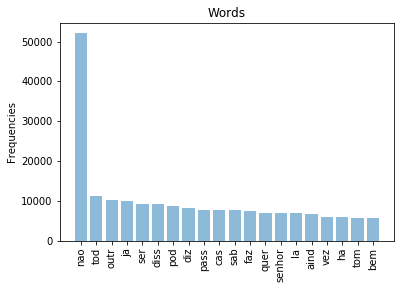

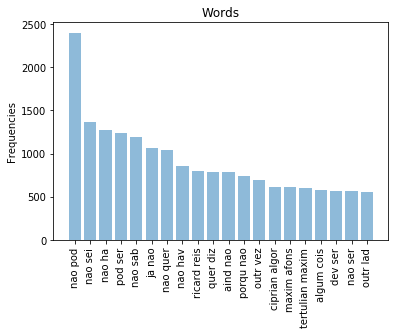

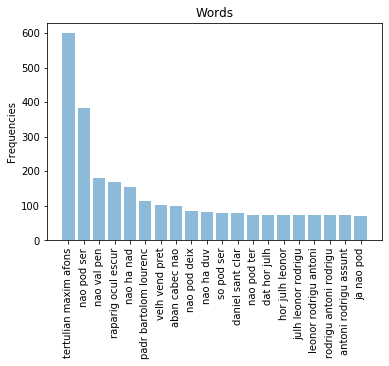

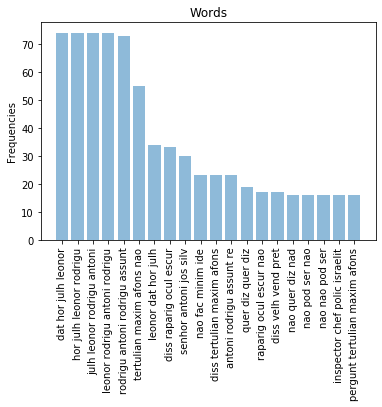

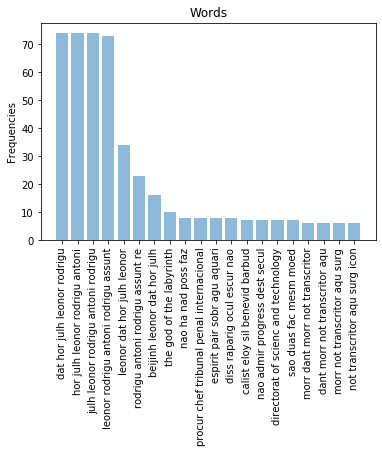

In [31]:
for i in range(1,6):
    top = get_top_n_grams(corpora["500 Clean Text"], top_k=20, n=i)
    plot_frequencies(top)

From these graphics we can see that up to 3-grams we are catching expressions, but from 4-grams onwards we are just finding parts of sentences that are common but are not actual expressions that would be relevant. This is relevant because when we vectorize the texts to a Bag-of-Words or TF-IDf model we will want to catch the 2-grams and 3-grams but not the 4-grams.

## Convert text into vectors

### Bag-of-words

In [25]:
cv = CountVectorizer(
    max_df=0.8,
    stop_words=stop_words, 
    max_features=10000, 
    ngram_range=(1,2)
)

In [26]:
X_train_cv_1 = cv.fit_transform(corpora_train_1['500 Clean Text'])
X_train_cv_2 = cv.fit_transform(corpora_train_2['500 Clean Text'])
X_train_cv_3 = cv.fit_transform(corpora_train_3['500 Clean Text'])
X_train_cv_4 = cv.fit_transform(corpora_train_4['500 Clean Text'])
X_train_cv_5 = cv.fit_transform(corpora_train_5['500 Clean Text'])

In [27]:
X_test_cv_1 = cv.fit_transform(corpora_test_1['500 Clean Text'])
X_test_cv_2 = cv.fit_transform(corpora_test_2['500 Clean Text'])
X_test_cv_3 = cv.fit_transform(corpora_test_3['500 Clean Text'])
X_test_cv_4 = cv.fit_transform(corpora_test_4['500 Clean Text'])
X_test_cv_5 = cv.fit_transform(corpora_test_5['500 Clean Text'])

### TF-IDF

In [28]:
tf_idf = TfidfVectorizer(
    max_df=0.8,
    stop_words=stop_words,
    max_features=10000, 
    ngram_range=(1,2)
)

In [29]:
X_train_tf_idf_1 = tf_idf.fit_transform(corpora_train_1['500 Clean Text'])
X_train_tf_idf_2 = tf_idf.fit_transform(corpora_train_2['500 Clean Text'])
X_train_tf_idf_3 = tf_idf.fit_transform(corpora_train_3['500 Clean Text'])
X_train_tf_idf_4 = tf_idf.fit_transform(corpora_train_4['500 Clean Text'])
X_train_tf_idf_5 = tf_idf.fit_transform(corpora_train_5['500 Clean Text'])

In [30]:
X_test_tf_idf_1 = tf_idf.fit_transform(corpora_test_1['500 Clean Text'])
X_test_tf_idf_2 = tf_idf.fit_transform(corpora_test_2['500 Clean Text'])
X_test_tf_idf_3 = tf_idf.fit_transform(corpora_test_3['500 Clean Text'])
X_test_tf_idf_4 = tf_idf.fit_transform(corpora_test_4['500 Clean Text'])
X_test_tf_idf_5 = tf_idf.fit_transform(corpora_test_5['500 Clean Text'])

### Word2Vec

In [38]:
X_train_w2v_1 = gensim.models.Word2Vec(corpora_train_1['500 Word List'],min_count=0,workers=4)
X_train_w2v_2 = gensim.models.Word2Vec(corpora_train_2['500 Word List'],min_count=0,workers=4)
X_train_w2v_3 = gensim.models.Word2Vec(corpora_train_3['500 Word List'],min_count=0,workers=4)
X_train_w2v_4 = gensim.models.Word2Vec(corpora_train_4['500 Word List'],min_count=0,workers=4)
X_train_w2v_5 = gensim.models.Word2Vec(corpora_train_5['500 Word List'],min_count=0,workers=4)

In [39]:
X_test_w2v_1 = gensim.models.Word2Vec(corpora_test_1['500 Word List'],min_count=0,workers=4)
X_test_w2v_2 = gensim.models.Word2Vec(corpora_test_2['500 Word List'],min_count=0,workers=4)
X_test_w2v_3 = gensim.models.Word2Vec(corpora_test_3['500 Word List'],min_count=0,workers=4)
X_test_w2v_4 = gensim.models.Word2Vec(corpora_test_4['500 Word List'],min_count=0,workers=4)
X_test_w2v_5 = gensim.models.Word2Vec(corpora_test_5['500 Word List'],min_count=0,workers=4)

### Class Encoding

In [31]:
Encoder = LabelEncoder()

le_1 = Encoder.fit(corpora_train_1['Author'])
le_2 = Encoder.fit(corpora_train_2['Author'])
le_3 = Encoder.fit(corpora_train_3['Author'])
le_4 = Encoder.fit(corpora_train_4['Author'])
le_5 = Encoder.fit(corpora_train_5['Author'])

In [32]:
Y_train_1 = pd.Series(le_1.transform(corpora_train_1['Author']),index=corpora_train_1.index)
Y_train_2 = pd.Series(le_2.transform(corpora_train_2['Author']),index=corpora_train_2.index)
Y_train_3 = pd.Series(le_3.transform(corpora_train_3['Author']),index=corpora_train_3.index)
Y_train_4 = pd.Series(le_4.transform(corpora_train_4['Author']),index=corpora_train_4.index)
Y_train_5 = pd.Series(le_4.transform(corpora_train_5['Author']),index=corpora_train_5.index)

In [33]:
Y_test_1 = pd.Series(le_1.transform(corpora_test_1['Author']),index=corpora_test_1.index)
Y_test_2 = pd.Series(le_2.transform(corpora_test_2['Author']),index=corpora_test_2.index)
Y_test_3 = pd.Series(le_3.transform(corpora_test_3['Author']),index=corpora_test_3.index)
Y_test_4 = pd.Series(le_4.transform(corpora_test_4['Author']),index=corpora_test_4.index)
Y_test_5 = pd.Series(le_5.transform(corpora_test_5['Author']),index=corpora_test_5.index)

## Classification Models

### k-nearest neighbors (baseline)

In [34]:
KNN_cv_1 = KNeighborsClassifier()
KNN_cv_2 = KNeighborsClassifier()
KNN_cv_3 = KNeighborsClassifier()
KNN_cv_4 = KNeighborsClassifier()
KNN_cv_5 = KNeighborsClassifier()

In [35]:
KNN_cv_1.fit(X_train_cv_1,Y_train_1)
KNN_cv_2.fit(X_train_cv_2,Y_train_2)
KNN_cv_3.fit(X_train_cv_3,Y_train_3)
KNN_cv_4.fit(X_train_cv_4,Y_train_4)
KNN_cv_5.fit(X_train_cv_5,Y_train_5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
predictions_KNN_cv_1 = KNN_cv_1.predict(X_test_cv_1)
predictions_KNN_cv_2 = KNN_cv_2.predict(X_test_cv_2)
predictions_KNN_cv_3 = KNN_cv_3.predict(X_test_cv_3)
predictions_KNN_cv_4 = KNN_cv_4.predict(X_test_cv_4)
predictions_KNN_cv_5 = KNN_cv_5.predict(X_test_cv_5)

In [37]:
accuracy_KNN_cv_1 = accuracy_score(Y_test_1,predictions_KNN_cv_1)*100
accuracy_KNN_cv_2 = accuracy_score(Y_test_2,predictions_KNN_cv_2)*100
accuracy_KNN_cv_3 = accuracy_score(Y_test_3,predictions_KNN_cv_3)*100
accuracy_KNN_cv_4 = accuracy_score(Y_test_4,predictions_KNN_cv_4)*100
accuracy_KNN_cv_5 = accuracy_score(Y_test_5,predictions_KNN_cv_5)*100

In [38]:
accuracy_KNN_cv = (accuracy_KNN_cv_1 + accuracy_KNN_cv_2 + accuracy_KNN_cv_3 + accuracy_KNN_cv_4 + accuracy_KNN_cv_5)/5
accuracy_KNN_cv

4.619414815013836

In [39]:
KNN_tf_idf_1 = KNeighborsClassifier()
KNN_tf_idf_2 = KNeighborsClassifier()
KNN_tf_idf_3 = KNeighborsClassifier()
KNN_tf_idf_4 = KNeighborsClassifier()
KNN_tf_idf_5 = KNeighborsClassifier()

In [40]:
KNN_tf_idf_1.fit(X_train_tf_idf_1,Y_train_1)
KNN_tf_idf_2.fit(X_train_tf_idf_2,Y_train_2)
KNN_tf_idf_3.fit(X_train_tf_idf_3,Y_train_3)
KNN_tf_idf_4.fit(X_train_tf_idf_4,Y_train_4)
KNN_tf_idf_5.fit(X_train_tf_idf_5,Y_train_5)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
predictions_KNN_tf_idf_1 = KNN_tf_idf_1.predict(X_test_tf_idf_1)
predictions_KNN_tf_idf_2 = KNN_tf_idf_2.predict(X_test_tf_idf_2)
predictions_KNN_tf_idf_3 = KNN_tf_idf_3.predict(X_test_tf_idf_3)
predictions_KNN_tf_idf_4 = KNN_tf_idf_4.predict(X_test_tf_idf_4)
predictions_KNN_tf_idf_5 = KNN_tf_idf_5.predict(X_test_tf_idf_5)

In [42]:
accuracy_KNN_tf_idf_1 = accuracy_score(Y_test_1,predictions_KNN_tf_idf_1)*100
accuracy_KNN_tf_idf_2 = accuracy_score(Y_test_2,predictions_KNN_tf_idf_2)*100
accuracy_KNN_tf_idf_3 = accuracy_score(Y_test_3,predictions_KNN_tf_idf_3)*100
accuracy_KNN_tf_idf_4 = accuracy_score(Y_test_4,predictions_KNN_tf_idf_4)*100
accuracy_KNN_tf_idf_5 = accuracy_score(Y_test_5,predictions_KNN_tf_idf_5)*100

In [43]:
accuracy_KNN_tf_idf = (accuracy_KNN_tf_idf_1 + accuracy_KNN_tf_idf_2 + accuracy_KNN_tf_idf_3 + accuracy_KNN_tf_idf_4 + accuracy_KNN_tf_idf_5)/5
accuracy_KNN_tf_idf

30.695970695970697

### Naive Bayes

In [44]:
NB_cv_1 = MultinomialNB()
NB_cv_2 = MultinomialNB()
NB_cv_3 = MultinomialNB()
NB_cv_4 = MultinomialNB()
NB_cv_5 = MultinomialNB()

In [45]:
NB_cv_1.fit(X_train_cv_1,Y_train_1)
NB_cv_2.fit(X_train_cv_2,Y_train_2)
NB_cv_3.fit(X_train_cv_3,Y_train_3)
NB_cv_4.fit(X_train_cv_4,Y_train_4)
NB_cv_5.fit(X_train_cv_5,Y_train_5)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
predictions_NB_cv_1 = NB_cv_1.predict(X_test_cv_1)
predictions_NB_cv_2 = NB_cv_2.predict(X_test_cv_2)
predictions_NB_cv_3 = NB_cv_3.predict(X_test_cv_3)
predictions_NB_cv_4 = NB_cv_4.predict(X_test_cv_4)
predictions_NB_cv_5 = NB_cv_5.predict(X_test_cv_5)

In [47]:
accuracy_NB_cv_1 = accuracy_score(Y_test_1,predictions_NB_cv_1)*100
accuracy_NB_cv_2 = accuracy_score(Y_test_2,predictions_NB_cv_2)*100
accuracy_NB_cv_3 = accuracy_score(Y_test_3,predictions_NB_cv_3)*100
accuracy_NB_cv_4 = accuracy_score(Y_test_4,predictions_NB_cv_4)*100
accuracy_NB_cv_5 = accuracy_score(Y_test_5,predictions_NB_cv_5)*100

In [48]:
accuracy_NB_cv = (accuracy_NB_cv_1 + accuracy_NB_cv_2 + accuracy_NB_cv_3 + accuracy_NB_cv_4 + accuracy_NB_cv_5)/5
accuracy_NB_cv

1.8573846691206104

In [49]:
NB_tf_idf_1 = MultinomialNB()
NB_tf_idf_2 = MultinomialNB()
NB_tf_idf_3 = MultinomialNB()
NB_tf_idf_4 = MultinomialNB()
NB_tf_idf_5 = MultinomialNB()

In [50]:
NB_tf_idf_1.fit(X_train_tf_idf_1,Y_train_1)
NB_tf_idf_2.fit(X_train_tf_idf_2,Y_train_2)
NB_tf_idf_3.fit(X_train_tf_idf_3,Y_train_3)
NB_tf_idf_4.fit(X_train_tf_idf_4,Y_train_4)
NB_tf_idf_5.fit(X_train_tf_idf_5,Y_train_5)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [51]:
predictions_NB_tf_idf_1 = NB_tf_idf_1.predict(X_test_tf_idf_1)
predictions_NB_tf_idf_2 = NB_tf_idf_2.predict(X_test_tf_idf_2)
predictions_NB_tf_idf_3 = NB_tf_idf_3.predict(X_test_tf_idf_3)
predictions_NB_tf_idf_4 = NB_tf_idf_4.predict(X_test_tf_idf_4)
predictions_NB_tf_idf_5 = NB_tf_idf_5.predict(X_test_tf_idf_5)

In [52]:
accuracy_NB_tf_idf_1 = accuracy_score(Y_test_1,predictions_NB_tf_idf_1)*100
accuracy_NB_tf_idf_2 = accuracy_score(Y_test_2,predictions_NB_tf_idf_2)*100
accuracy_NB_tf_idf_3 = accuracy_score(Y_test_3,predictions_NB_tf_idf_3)*100
accuracy_NB_tf_idf_4 = accuracy_score(Y_test_4,predictions_NB_tf_idf_4)*100
accuracy_NB_tf_idf_5 = accuracy_score(Y_test_5,predictions_NB_tf_idf_5)*100

In [53]:
accuracy_NB_tf_idf = (accuracy_NB_tf_idf_1 + accuracy_NB_tf_idf_2 + accuracy_NB_tf_idf_3 + accuracy_NB_tf_idf_4 + accuracy_NB_tf_idf_5)/5
accuracy_NB_tf_idf

27.201548790790845

### SVM

In [63]:
SVM_cv_1 = SVC()
SVM_cv_2 = SVC()
SVM_cv_3 = SVC()
SVM_cv_4 = SVC()
SVM_cv_5 = SVC()

In [64]:
SVM_cv_1.fit(X_train_cv_1,Y_train_1)
SVM_cv_2.fit(X_train_cv_2,Y_train_2)
SVM_cv_3.fit(X_train_cv_3,Y_train_3)
SVM_cv_4.fit(X_train_cv_4,Y_train_4)
SVM_cv_5.fit(X_train_cv_5,Y_train_5)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
predictions_SVM_cv_1 = SVM_cv_1.predict(X_test_cv_1)
predictions_SVM_cv_2 = SVM_cv_2.predict(X_test_cv_2)
predictions_SVM_cv_3 = SVM_cv_3.predict(X_test_cv_3)
predictions_SVM_cv_4 = SVM_cv_4.predict(X_test_cv_4)
predictions_SVM_cv_5 = SVM_cv_5.predict(X_test_cv_5)

In [66]:
accuracy_SVM_cv_1 = accuracy_score(Y_test_1,predictions_SVM_cv_1)*100
accuracy_SVM_cv_2 = accuracy_score(Y_test_2,predictions_SVM_cv_2)*100
accuracy_SVM_cv_3 = accuracy_score(Y_test_3,predictions_SVM_cv_3)*100
accuracy_SVM_cv_4 = accuracy_score(Y_test_4,predictions_SVM_cv_4)*100
accuracy_SVM_cv_5 = accuracy_score(Y_test_5,predictions_SVM_cv_5)*100

In [67]:
accuracy_SVM_cv = (accuracy_SVM_cv_1 + accuracy_SVM_cv_2 + accuracy_SVM_cv_3 + accuracy_SVM_cv_4 + accuracy_SVM_cv_5)/5
accuracy_SVM_cv

33.0891032358025

In [68]:
SVM_tf_idf_1 = SVC()
SVM_tf_idf_2 = SVC()
SVM_tf_idf_3 = SVC()
SVM_tf_idf_4 = SVC()
SVM_tf_idf_5 = SVC()

In [69]:
SVM_tf_idf_1.fit(X_train_tf_idf_1,Y_train_1)
SVM_tf_idf_2.fit(X_train_tf_idf_2,Y_train_2)
SVM_tf_idf_3.fit(X_train_tf_idf_3,Y_train_3)
SVM_tf_idf_4.fit(X_train_tf_idf_4,Y_train_4)
SVM_tf_idf_5.fit(X_train_tf_idf_5,Y_train_5)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
predictions_SVM_tf_idf_1 = SVM_tf_idf_1.predict(X_test_tf_idf_1)
predictions_SVM_tf_idf_2 = SVM_tf_idf_2.predict(X_test_tf_idf_2)
predictions_SVM_tf_idf_3 = SVM_tf_idf_3.predict(X_test_tf_idf_3)
predictions_SVM_tf_idf_4 = SVM_tf_idf_4.predict(X_test_tf_idf_4)
predictions_SVM_tf_idf_5 = SVM_tf_idf_5.predict(X_test_tf_idf_5)

In [71]:
accuracy_SVM_tf_idf_1 = accuracy_score(Y_test_1,predictions_SVM_tf_idf_1)*100
accuracy_SVM_tf_idf_2 = accuracy_score(Y_test_2,predictions_SVM_tf_idf_2)*100
accuracy_SVM_tf_idf_3 = accuracy_score(Y_test_3,predictions_SVM_tf_idf_3)*100
accuracy_SVM_tf_idf_4 = accuracy_score(Y_test_4,predictions_SVM_tf_idf_4)*100
accuracy_SVM_tf_idf_5 = accuracy_score(Y_test_5,predictions_SVM_tf_idf_5)*100

In [72]:
accuracy_SVM_tf_idf = (accuracy_SVM_tf_idf_1 + accuracy_SVM_tf_idf_2 + accuracy_SVM_tf_idf_3 + accuracy_SVM_tf_idf_4 + accuracy_SVM_tf_idf_5)/5
accuracy_SVM_tf_idf

32.7224147762045

### Decision Tree

In [73]:
DT_cv_1 = DecisionTreeClassifier()
DT_cv_2 = DecisionTreeClassifier()
DT_cv_3 = DecisionTreeClassifier()
DT_cv_4 = DecisionTreeClassifier()
DT_cv_5 = DecisionTreeClassifier()

In [74]:
DT_cv_1.fit(X_train_cv_1,Y_train_1)
DT_cv_2.fit(X_train_cv_2,Y_train_2)
DT_cv_3.fit(X_train_cv_3,Y_train_3)
DT_cv_4.fit(X_train_cv_4,Y_train_4)
DT_cv_5.fit(X_train_cv_5,Y_train_5)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [75]:
predictions_DT_cv_1 = DT_cv_1.predict(X_test_cv_1)
predictions_DT_cv_2 = DT_cv_2.predict(X_test_cv_2)
predictions_DT_cv_3 = DT_cv_3.predict(X_test_cv_3)
predictions_DT_cv_4 = DT_cv_4.predict(X_test_cv_4)
predictions_DT_cv_5 = DT_cv_5.predict(X_test_cv_5)

In [76]:
accuracy_DT_cv_1 = accuracy_score(Y_test_1,predictions_DT_cv_1)*100
accuracy_DT_cv_2 = accuracy_score(Y_test_2,predictions_DT_cv_2)*100
accuracy_DT_cv_3 = accuracy_score(Y_test_3,predictions_DT_cv_3)*100
accuracy_DT_cv_4 = accuracy_score(Y_test_4,predictions_DT_cv_4)*100
accuracy_DT_cv_5 = accuracy_score(Y_test_5,predictions_DT_cv_5)*100

In [77]:
accuracy_DT_cv = (accuracy_DT_cv_1 + accuracy_DT_cv_2 + accuracy_DT_cv_3 + accuracy_DT_cv_4 + accuracy_DT_cv_5)/5
accuracy_DT_cv

21.64787399506226

In [78]:
DT_tf_idf_1 = DecisionTreeClassifier()
DT_tf_idf_2 = DecisionTreeClassifier()
DT_tf_idf_3 = DecisionTreeClassifier()
DT_tf_idf_4 = DecisionTreeClassifier()
DT_tf_idf_5 = DecisionTreeClassifier()

In [79]:
DT_tf_idf_1.fit(X_train_tf_idf_1,Y_train_1)
DT_tf_idf_2.fit(X_train_tf_idf_2,Y_train_2)
DT_tf_idf_3.fit(X_train_tf_idf_3,Y_train_3)
DT_tf_idf_4.fit(X_train_tf_idf_4,Y_train_4)
DT_tf_idf_5.fit(X_train_tf_idf_5,Y_train_5)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
predictions_DT_tf_idf_1 = DT_tf_idf_1.predict(X_test_tf_idf_1)
predictions_DT_tf_idf_2 = DT_tf_idf_2.predict(X_test_tf_idf_2)
predictions_DT_tf_idf_3 = DT_tf_idf_3.predict(X_test_tf_idf_3)
predictions_DT_tf_idf_4 = DT_tf_idf_4.predict(X_test_tf_idf_4)
predictions_DT_tf_idf_5 = DT_tf_idf_5.predict(X_test_tf_idf_5)

In [81]:
accuracy_DT_tf_idf_1 = accuracy_score(Y_test_1,predictions_DT_tf_idf_1)*100
accuracy_DT_tf_idf_2 = accuracy_score(Y_test_2,predictions_DT_tf_idf_2)*100
accuracy_DT_tf_idf_3 = accuracy_score(Y_test_3,predictions_DT_tf_idf_3)*100
accuracy_DT_tf_idf_4 = accuracy_score(Y_test_4,predictions_DT_tf_idf_4)*100
accuracy_DT_tf_idf_5 = accuracy_score(Y_test_5,predictions_DT_tf_idf_5)*100

In [82]:
accuracy_DT_tf_idf = (accuracy_DT_tf_idf_1 + accuracy_DT_tf_idf_2 + accuracy_DT_tf_idf_3 + accuracy_DT_tf_idf_4 + accuracy_DT_tf_idf_5)/5
accuracy_DT_tf_idf

25.90322744356974

### Logistic Regression

In [83]:
LR_cv_1 = LogisticRegression()
LR_cv_2 = LogisticRegression()
LR_cv_3 = LogisticRegression()
LR_cv_4 = LogisticRegression()
LR_cv_5 = LogisticRegression()

In [84]:
LR_cv_1.fit(X_train_cv_1,Y_train_1)
LR_cv_2.fit(X_train_cv_2,Y_train_2)
LR_cv_3.fit(X_train_cv_3,Y_train_3)
LR_cv_4.fit(X_train_cv_4,Y_train_4)
LR_cv_5.fit(X_train_cv_5,Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
predictions_LR_cv_1 = LR_cv_1.predict(X_test_cv_1)
predictions_LR_cv_2 = LR_cv_2.predict(X_test_cv_2)
predictions_LR_cv_3 = LR_cv_3.predict(X_test_cv_3)
predictions_LR_cv_4 = LR_cv_4.predict(X_test_cv_4)
predictions_LR_cv_5 = LR_cv_5.predict(X_test_cv_5)

In [86]:
accuracy_LR_cv_1 = accuracy_score(Y_test_1,predictions_LR_cv_1)*100
accuracy_LR_cv_2 = accuracy_score(Y_test_2,predictions_LR_cv_2)*100
accuracy_LR_cv_3 = accuracy_score(Y_test_3,predictions_LR_cv_3)*100
accuracy_LR_cv_4 = accuracy_score(Y_test_4,predictions_LR_cv_4)*100
accuracy_LR_cv_5 = accuracy_score(Y_test_5,predictions_LR_cv_5)*100

In [87]:
accuracy_LR_cv = (accuracy_LR_cv_1 + accuracy_LR_cv_2 + accuracy_LR_cv_3 + accuracy_LR_cv_4 + accuracy_LR_cv_5)/5
accuracy_LR_cv

22.262046565225052

In [88]:
LR_tf_idf_1 = LogisticRegression()
LR_tf_idf_2 = LogisticRegression()
LR_tf_idf_3 = LogisticRegression()
LR_tf_idf_4 = LogisticRegression()
LR_tf_idf_5 = LogisticRegression()

In [89]:
LR_tf_idf_1.fit(X_train_tf_idf_1,Y_train_1)
LR_tf_idf_2.fit(X_train_tf_idf_2,Y_train_2)
LR_tf_idf_3.fit(X_train_tf_idf_3,Y_train_3)
LR_tf_idf_4.fit(X_train_tf_idf_4,Y_train_4)
LR_tf_idf_5.fit(X_train_tf_idf_5,Y_train_5)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
predictions_LR_tf_idf_1 = LR_tf_idf_1.predict(X_test_tf_idf_1)
predictions_LR_tf_idf_2 = LR_tf_idf_2.predict(X_test_tf_idf_2)
predictions_LR_tf_idf_3 = LR_tf_idf_3.predict(X_test_tf_idf_3)
predictions_LR_tf_idf_4 = LR_tf_idf_4.predict(X_test_tf_idf_4)
predictions_LR_tf_idf_5 = LR_tf_idf_5.predict(X_test_tf_idf_5)

In [91]:
accuracy_LR_tf_idf_1 = accuracy_score(Y_test_1,predictions_LR_tf_idf_1)*100
accuracy_LR_tf_idf_2 = accuracy_score(Y_test_2,predictions_LR_tf_idf_2)*100
accuracy_LR_tf_idf_3 = accuracy_score(Y_test_3,predictions_LR_tf_idf_3)*100
accuracy_LR_tf_idf_4 = accuracy_score(Y_test_4,predictions_LR_tf_idf_4)*100
accuracy_LR_tf_idf_5 = accuracy_score(Y_test_5,predictions_LR_tf_idf_5)*100

In [92]:
accuracy_LR_tf_idf = (accuracy_LR_tf_idf_1 + accuracy_LR_tf_idf_2 + accuracy_LR_tf_idf_3 + accuracy_LR_tf_idf_4 + accuracy_LR_tf_idf_5)/5
accuracy_LR_tf_idf

32.844664164957564

### Word2Vec

In [104]:
def text_score(corpora,w2v):
    text_scores = []
    
    for i in tqdm(corpora.index):
        text = corpora['500 Word List'].iloc[i]
        n = len(text)
        text_vect = []

        for word in text:
            if text_vect == []:
                text_vect = w2v[word]

            else:
                text_vect = np.add(text_vect,w2v[word])

        score = list(np.asarray(text_vect) / n)

        text_scores.append(score)
    
    return text_scores

In [106]:
v_train_cv_1 = text_score(corpora_train_1,X_train_w2v_1)
v_train_cv_2 = text_score(corpora_train_2,X_train_w2v_2)
v_train_cv_3 = text_score(corpora_train_3,X_train_w2v_3)
v_train_cv_4 = text_score(corpora_train_4,X_train_w2v_4)
v_train_cv_5 = text_score(corpora_train_5,X_train_w2v_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [107]:
v_test_cv_1 = text_score(corpora_test_1,X_test_w2v_1)
v_test_cv_2 = text_score(corpora_test_2,X_test_w2v_2)
v_test_cv_3 = text_score(corpora_test_3,X_test_w2v_3)
v_test_cv_4 = text_score(corpora_test_4,X_test_w2v_4)
v_test_cv_5 = text_score(corpora_test_5,X_test_w2v_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Mafalda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [108]:
MLP_1 = MLPClassifier()
MLP_2 = MLPClassifier()
MLP_3 = MLPClassifier()
MLP_4 = MLPClassifier()
MLP_5 = MLPClassifier()

In [110]:
MLP_1.fit(v_train_cv_1, Y_train_1)
MLP_2.fit(v_train_cv_2, Y_train_2)
MLP_3.fit(v_train_cv_3, Y_train_3)
MLP_4.fit(v_train_cv_4, Y_train_4)
MLP_5.fit(v_train_cv_5, Y_train_5)

C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Mafalda\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_it

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [111]:
predictions_MLP_1 = MLP_1.predict(v_test_cv_1)
predictions_MLP_2 = MLP_2.predict(v_test_cv_2)
predictions_MLP_3 = MLP_3.predict(v_test_cv_3)
predictions_MLP_4 = MLP_4.predict(v_test_cv_4)
predictions_MLP_5 = MLP_5.predict(v_test_cv_5)

In [112]:
accuracy_MLP_1 = accuracy_score(Y_test_1,predictions_MLP_1)*100
accuracy_MLP_2 = accuracy_score(Y_test_2,predictions_MLP_2)*100
accuracy_MLP_3 = accuracy_score(Y_test_3,predictions_MLP_3)*100
accuracy_MLP_4 = accuracy_score(Y_test_4,predictions_MLP_4)*100
accuracy_MLP_5 = accuracy_score(Y_test_5,predictions_MLP_5)*100

In [113]:
accuracy_MLP = (accuracy_MLP_1 + accuracy_MLP_2 + accuracy_MLP_3 + accuracy_MLP_4 + accuracy_MLP_5)/5
accuracy_MLP

17.030578766520087

## Dummy algorithm

In [122]:
def dummy_algorithm(train, test, k):
    authors = pd.Series(index = test.index)
    for j in tqdm(test.index):
        text = test['500 Word List'][j]
        similarity = pd.Series(index = corpora.index) #similarity score

        #for every text excerpt in the corpora
        for i in tqdm(corpora.index):
            sim = 0
            #if the word in the corpora text is also in the text we want to classify then the corpora text gets a point
            for word in text:
                if word in corpora['500 Word List'][i]:
                    sim += 1

            similarity[i] = sim

        #get top k scores
        similarity.sort_values(ascending=False, inplace=True)

        similarity = similarity[:k]

        classification = []

        #get the authors of the most similar texts
        for i in similarity.index:
            author = corpora['Author'][i]
            classification.append(author)

        knn = pd.DataFrame({'Similarity':similarity.values,'Author':classification})
        knn.set_index(similarity.index, inplace=True)

        #get the most frequent author in the top k
        a = knn['Author'].mode()
        print(a)

        #if there's two or more authors with the biggest frequency get the one with the highest similarity score
        if a.shape[0]>1:
            a = knn.loc[knn['Author'].isin(a.values)].reset_index().loc[0,['Author']]
            
        #print(a)
        #print(a.type)
        authors[j] = a.values
        
    return authors

In [123]:
dummy_algorithm(corpora_train_1,corpora_test_1,5)

0    Almada Negreiros
dtype: object


0    Jose Saramago
dtype: object


0         Almada Negreiros
1    Camilo Castelo Branco
dtype: object


0    Almada Negreiros
dtype: object


0    Almada Negreiros
dtype: object


0    Almada Negreiros
dtype: object


0    Almada Negreiros
dtype: object


0    Almada Negreiros
dtype: object


0    Almada Negreiros
dtype: object


0    Jose Rodrigues dos Santos
dtype: object


0    Almada Negreiros
dtype: object


0    Almada Negreiros
1      Eca de Queiros
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Camilo Castelo Branco
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


0    Eca de Queiros
dtype: object


KeyboardInterrupt: 